<a href="https://colab.research.google.com/github/pat3rmars/Cat-or-Dog-Image-Classification-Using-CNN-DL-/blob/main/cat_or_dog%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gathering Dataset using kaggle api

In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle

##Downloading Dataset

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


##Extracting Data from the Zip file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#Importing neccessary Modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

#Using generators to seperate our dataset into batches to save Memory(RAM)

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

testing_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#Normalizing our dataset

In [ ]:
def function(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(function)
testing_dataset = testing_dataset.map(function)


#CNN Model

##Creating CNN network

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

##Overview of our model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

##Compiling and training our model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min", patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_dataset,epochs=50,validation_data=testing_dataset, callbacks=[earlystopping])

Epoch 1/50
625/625 [==============================] - 55s 85ms/step - loss: 0.6774 - accuracy: 0.5739 - val_loss: 0.6686 - val_accuracy: 0.6328
Epoch 2/50
625/625 [==============================] - 53s 84ms/step - loss: 0.5673 - accuracy: 0.7037 - val_loss: 0.4980 - val_accuracy: 0.7654
Epoch 3/50
625/625 [==============================] - 52s 83ms/step - loss: 0.4233 - accuracy: 0.8017 - val_loss: 0.5517 - val_accuracy: 0.7714
Epoch 4/50
625/625 [==============================] - 55s 87ms/step - loss: 0.2738 - accuracy: 0.8821 - val_loss: 0.6710 - val_accuracy: 0.7742
Epoch 5/50
625/625 [==============================] - 53s 85ms/step - loss: 0.1417 - accuracy: 0.9462 - val_loss: 0.9833 - val_accuracy: 0.7498
Epoch 6/50
625/625 [==============================] - 51s 81ms/step - loss: 0.0881 - accuracy: 0.9691 - val_loss: 1.1423 - val_accuracy: 0.7674
Epoch 7/50
625/625 [==============================] - 51s 82ms/step - loss: 0.0602 - accuracy: 0.9793 - val_loss: 1.2235 - val_accuracy:

Thus this shows we should maximum go till epoch 7 to overcome overfitting.

#Analysis of our Model

##Accuracy Graph

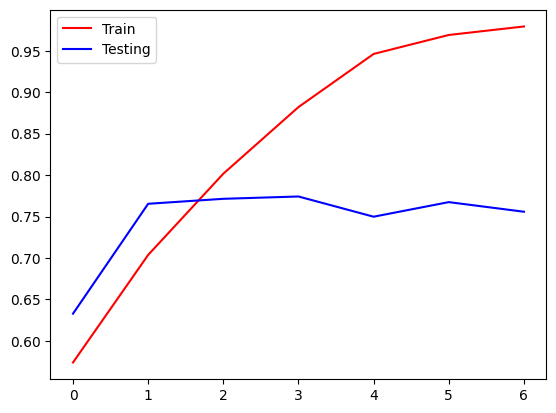

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Testing')
plt.legend()
plt.show()

##Loss Graph

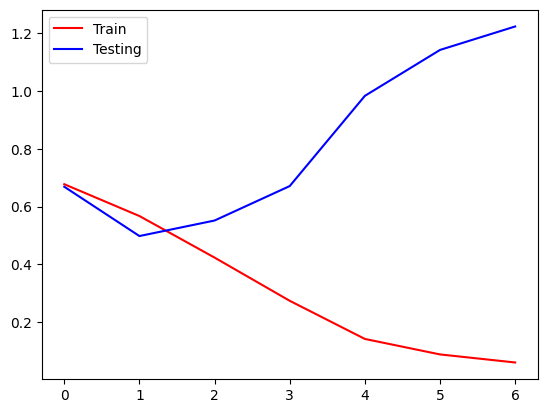

In [ ]:
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Testing')
plt.legend()
plt.show()

Since, it was over-fitting so I tried Batch Normalization and Dropout method to fix it.

#Applying Batch Normalization and Dropout

##Creating New CNN network

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

##Overview of our model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

## Compiling and training our model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min", patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_dataset,epochs=30,validation_data=testing_dataset, callbacks=[earlystopping])

Epoch 1/30
625/625 [==============================] - 80s 122ms/step - loss: 1.3268 - accuracy: 0.6020 - val_loss: 0.6014 - val_accuracy: 0.6876
Epoch 2/30
625/625 [==============================] - 65s 103ms/step - loss: 0.5725 - accuracy: 0.7042 - val_loss: 0.7938 - val_accuracy: 0.5648
Epoch 3/30
625/625 [==============================] - 67s 106ms/step - loss: 0.5008 - accuracy: 0.7608 - val_loss: 0.5286 - val_accuracy: 0.7164
Epoch 4/30
625/625 [==============================] - 66s 105ms/step - loss: 0.4355 - accuracy: 0.7984 - val_loss: 0.6407 - val_accuracy: 0.6492
Epoch 5/30
625/625 [==============================] - 71s 114ms/step - loss: 0.3678 - accuracy: 0.8358 - val_loss: 0.5242 - val_accuracy: 0.7714
Epoch 6/30
625/625 [==============================] - 65s 103ms/step - loss: 0.3174 - accuracy: 0.8615 - val_loss: 1.6393 - val_accuracy: 0.6110
Epoch 7/30
625/625 [==============================] - 64s 102ms/step - loss: 0.2319 - accuracy: 0.9054 - val_loss: 0.6780 - val_ac

## Downloading our final Trained model

In [ ]:
model.save('catvsdog.h5')

#Analysis of our model

##Accuracy Graph

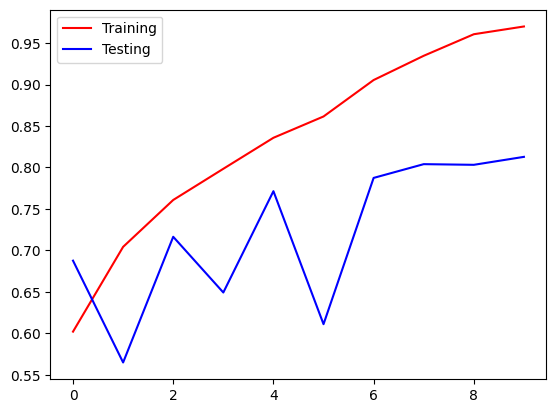

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='Training')
plt.plot(history.history['val_accuracy'],color='blue',label='Testing')
plt.legend()
plt.show()

##Loss Graph

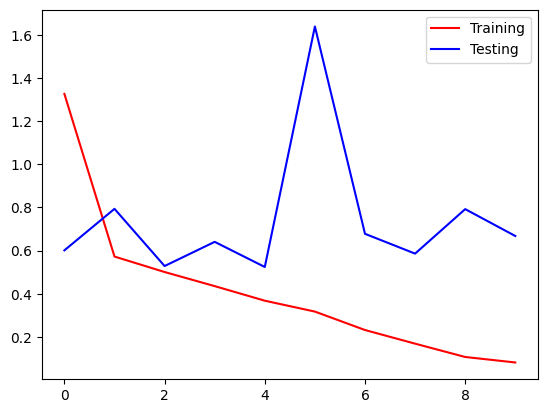

In [ ]:
plt.plot(history.history['loss'],color='red',label='Training')
plt.plot(history.history['val_loss'],color='blue',label='Testing')
plt.legend()
plt.show()

#Testing our trained model

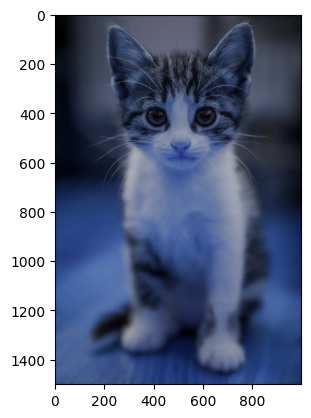

In [ ]:
import cv2
test_img = cv2.imread('/content/photo-1615789591457-74a63395c990.jpeg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(1500, 1000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))

In [ ]:
a = model.predict(test_input)

if a==[[0]]:
    print('It is a cat.')
else:
    print('It is a dog.')

1/1 [==============================] - 0s 19ms/step
It is a cat.


**Feel Free to use and explore my project.**

---


**Have a Good Day : )**